Расчет коэффициентов трения разными методами

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import neftpy.pipe as pipe


In [2]:
n_Re_array = np.linspace(100, 100000, 3000)
ed_list = np.array([0.0001,  0.1])

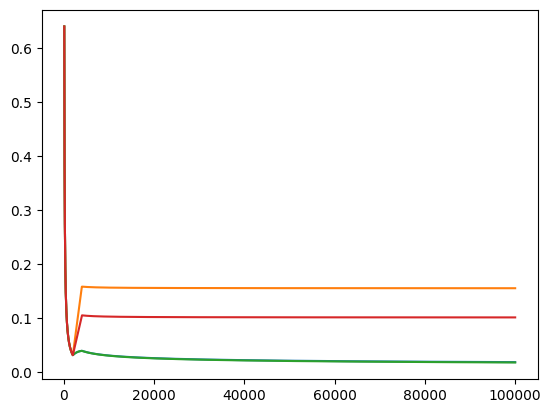

In [3]:
for ed in ed_list:
    f = pipe.npy_friction_factor(n_Re = n_Re_array, ed= ed,
                             friction_corr="Zigrang_Sylvester")
    plt.plot(n_Re_array, f)

for ed in ed_list:
    f = pipe.npy_friction_factor(n_Re = n_Re_array, ed= ed,
                             friction_corr="Zigrang_Sylvester_refined")
    plt.plot(n_Re_array, f)

In [62]:

# Define the transition limits
lower_Re_lim = 2000.0
upper_Re_lim = 4000.0

In [63]:

# Initialize the friction factor array
f_n = np.zeros_like(n_Re_array, dtype=float)

In [64]:

# Handle laminar flow (Re <= lower_Re_lim)
laminar_mask = n_Re_array <= lower_Re_lim

# Handle turbulent flow (Re > lower_Re_lim)
turbulent_mask = n_Re_array > lower_Re_lim

f_n[laminar_mask] = 64 / n_Re_array[laminar_mask]

# Calculate friction factor using the selected correlation
f_n[turbulent_mask] = _npy_friction_factor_Brkic(n_Re_array[turbulent_mask], ed)
    


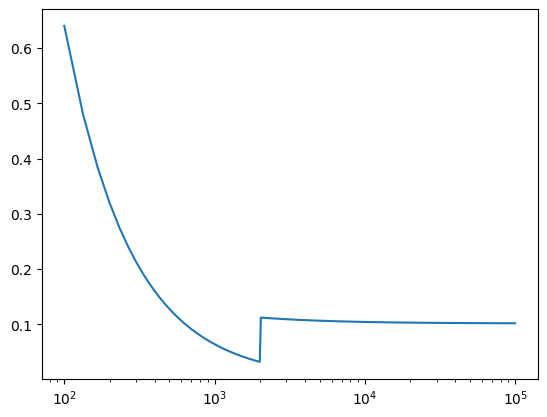

In [65]:

plt.plot(n_Re_array, f_n)
plt.xscale('log')

In [ ]:
mult_n_Re = np.array([0, lower_Re_lim, upper_Re_lim, upper_Re_lim * 10])
mult_val = np.array([0, 0, 1, 1])


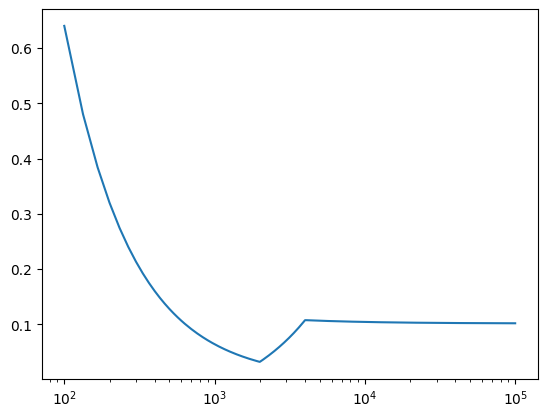

In [ ]:

f_n[turbulent_mask] = (_npy_friction_factor_Brkic(n_Re_array[turbulent_mask], ed) * np.interp(n_Re_array[turbulent_mask], mult_n_Re, mult_val ) + 
                       64 / lower_Re_lim * (1 -  np.interp(n_Re_array[turbulent_mask], mult_n_Re, mult_val )))
plt.plot(n_Re_array, f_n)
plt.xscale('log')

In [32]:

Re_save = np.where((n_Re_array > lower_Re_lim) & (n_Re_array < upper_Re_lim), n_Re_array, -1)

In [33]:
Re_save

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  2.01648829e+03,  2.35090301e+03,
        2.68531773e+03,  3.01973244e+03,  3.35414716e+03,  3.68856187e+03,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -

In [35]:
f_n

array([6.4       , 0.18582249, 0.09427994, 0.06316345, 0.04748976,
       0.03804828, 0.16168641, 0.16086106, 0.16023561, 0.15974525,
       0.15935047, 0.1590258 , 0.15875408, 0.15852334, 0.15832495,
       0.15815255, 0.15800135, 0.15786767, 0.15774862, 0.15764193,
       0.15754578, 0.15745866, 0.15737937, 0.15730689, 0.15724039,
       0.15717915, 0.15712258, 0.15707015, 0.15702144, 0.15697605,
       0.15693366, 0.15689398, 0.15685677, 0.15682179, 0.15678885,
       0.15675778, 0.15672842, 0.15670064, 0.15667431, 0.15664932,
       0.15662557, 0.15660297, 0.15658144, 0.15656091, 0.15654131,
       0.15652257, 0.15650464, 0.15648747, 0.15647101, 0.15645522,
       0.15644005, 0.15642548, 0.15641147, 0.15639798, 0.15638499,
       0.15637247, 0.1563604 , 0.15634874, 0.15633749, 0.15632661,
       0.1563161 , 0.15630593, 0.15629609, 0.15628656, 0.15627732,
       0.15626837, 0.15625969, 0.15625126, 0.15624308, 0.15623514,
       0.15622743, 0.15621993, 0.15621264, 0.15620555, 0.15619